In [2]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
from tqdm import tqdm
import spectral.io.envi as envi

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import cv2

In [5]:
file_place = "/home/conor/Desktop/BRC961"

In [6]:
label_file_place = os.path.join(file_place, "labelled_cores")
label_file_names = os.listdir(label_file_place)

datacubes_file_place = os.path.join(file_place, "datacubes")
datacubes_file_names = os.listdir(datacubes_file_place)

In [7]:
tissue_colours = dict(zip(["blood", "coll", "epith", "fibro", "lymph", "myo", "necrosis"], plt.cm.tab10.colors))

In [66]:
tissue_colours

{'blood': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'coll': (1.0, 0.4980392156862745, 0.054901960784313725),
 'epith': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'fibro': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'lymph': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'myo': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'necrosis': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}

  0%|          | 0/89 [00:00<?, ?it/s]

Header parameter names converted to lower case.
D3.png


TypeError: return arrays must be of ArrayType

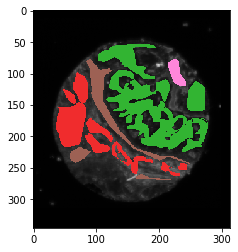

In [81]:
for im_name in tqdm(label_file_names):
    
    label_im = imageio.imread(os.path.join(label_file_place, im_name))
    #label_im = cv2.imread(os.path.join(label_file_place, im_name))
    
    header = os.path.join(datacubes_file_place, im_name[:-4] + ".HDR")
    img_file = os.path.join(datacubes_file_place, im_name[:-4] + ".img")
    
    datacube = envi.open(header, img_file)
    
    print(im_name)
    
    plt.figure()
    plt.imshow(label_im)
    
    for name, colour in tissue_colours.items():
        
        print(np.ceil(colour/np.sum(colour),2))
        
        indices = np.all((label_im == np.ceil(colour/np.sum(colour)),2) or (label_im == np.ceil(colour/np.sum(colour))), axis = 2)

        plt.figure()
        plt.imshow(indices)
    
    break
    
plt.show()

255
[ 5. 17.  5.]
[ 4. 16.  4.]


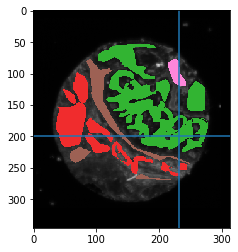

In [88]:
label_im = imageio.imread(os.path.join(label_file_place, "D3.png"))

x, y = 232, 200

print(np.max(label_im))

plt.imshow(label_im)
plt.axvline(x)
plt.axhline(y)

print(np.ceil(label_im[y,x,:]/np.sum(label_im[y,x,:])*25))
print(np.floor(label_im[y,x,:]/np.sum(label_im[y,x,:])*25))

255
[ 453. 1646.  453.]
[ 452. 1645.  452.]


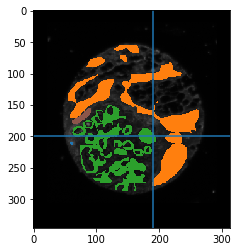

In [87]:
label_im = imageio.imread(os.path.join(label_file_place, "D4.png"))

x, y = 190, 200

print(np.max(label_im))

plt.imshow(label_im)
plt.axvline(x)
plt.axhline(y)

print(np.ceil(label_im[y,x,:]/np.sum(label_im[y,x,:])*2550))
print(np.floor(label_im[y,x,:]/np.sum(label_im[y,x,:])*2550))

255
[0.64393939 0.32070707 0.03535354]


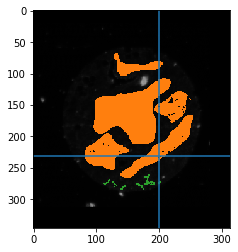

In [75]:
label_im = imageio.imread(os.path.join(label_file_place, "A3.png"))

x, y = 200, 232

print(np.max(label_im))

plt.imshow(label_im)
plt.axvline(x)
plt.axhline(y)

print(label_im[y,x,:]/np.sum(label_im[y,x,:]))

In [73]:
pd.DataFrame(np.where(np.all(label_im == label_im[232,200,:], axis = 2)))

,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
0,25,54,54,58,61,62,64,65,65,66,...,286,287,287,288,288,289,290,290,290,291
1,211,143,154,130,120,190,146,114,182,153,...,180,153,159,153,159,153,160,162,163,158


In [19]:
tissue_colours

{'blood': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'coll': (1.0, 0.4980392156862745, 0.054901960784313725),
 'epith': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'fibro': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'lymph': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'myo': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'necrosis': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}

In [ ]:
new_tiss_colours = {"myo": [157,97,84]
                   ,"fibro": [240,44,45]
                   ,"epith" : [50,180,50]
                   ,"necrosis": [255,134,218]
                   ,""}

In [40]:
1/286.875

0.003485838779956427

In [46]:
for name, colour in tissue_colours.items():
    
    print(name, [el*255 for el in colour])

blood [31.0, 119.0, 180.0]
coll [255.0, 127.0, 14.0]
epith [44.0, 160.0, 44.0]
fibro [214.0, 39.0, 40.0]
lymph [148.0, 103.0, 189.0]
myo [140.0, 86.0, 75.0]
necrosis [227.0, 119.0, 194.0]


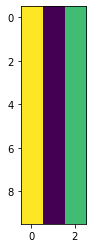

In [15]:
plt.imshow([[el for el in colour] for _ in range(10)])

In [ ]:

file = r"/media/conor/Maxtor/Breast_Cancer_US_dataset/brc961-br1001/brc961-br1001"
header = r"/media/conor/Maxtor/Breast_Cancer_US_dataset/brc961-br1001/brc961-br1001.hdr"

img = envi.open(header, file)